## The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. 
## Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps. 
## Explore and analyze the data to discover key factors responsible for app engagement and success.

In [520]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

os.chdir(r"C:\Users\asus\Desktop\Almabetter\datasets\capstone projects")

In [521]:
df1 = pd.read_csv("Play Store Data.csv")
df2 = pd.read_csv("User Reviews.csv")

In [522]:
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [523]:
df2.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [524]:
df1[["date","year"]] = df1["Last Updated"].str.split(",",expand=True)
df1.drop("Last Updated", axis=1, inplace=True)

In [525]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Current Ver     10833 non-null  object 
 11  Android Ver     10838 non-null  object 
 12  date            10841 non-null  object 
 13  year            10840 non-null  object 
dtypes: float64(1), object(13)
memory usage: 1.2+ MB


In [526]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


# Data Cleaning

In [527]:
# Data type of installs column is string and we have to convert this string data type into int and removing unwanted strings(+,)

# here rstrip function is used to remove the right most string('+') from the string

df1["Installs"] = df1["Installs"].map(lambda x: x.rstrip("+"))

# here split method is used to remove "," between the numbers and then join method is joining the splitted string.

df1["Installs"] = df1["Installs"].map(lambda x: ''.join(x.split(",")))


In [528]:
df1["Size"] = df1["Size"].map(lambda x: x.rstrip("M"))


df1["Size"] = df1["Size"].map(lambda x: str(round((float(x.rstrip("k"))/1024),2)) if x[-1] == "k" else x)



In [529]:
df1["Price"] = df1["Price"].map(lambda x: x.lstrip("$") if x.startswith("$") else x)

In [530]:
df1.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Current Ver          8
Android Ver          3
date                 0
year                 1
dtype: int64

In [531]:
df2.isna().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [532]:
df1["Rating"].fillna(df1["Rating"].mean(), inplace = True)

In [533]:
df1.dropna(axis=0,inplace=True)

df1 = df1.drop(df1[df1["Size"] =="Varies with device"].index,axis=0)

df1.reset_index(drop=True, inplace=True)

In [534]:
df2[df2["Translated_Review"].isna()].head(100)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
2,10 Best Foods for You,NaN,NaN,NaN,NaN
7,10 Best Foods for You,NaN,NaN,NaN,NaN
15,10 Best Foods for You,NaN,NaN,NaN,NaN
102,10 Best Foods for You,NaN,NaN,NaN,NaN
107,10 Best Foods for You,NaN,NaN,NaN,NaN
...,...,...,...,...,...
793,3D Blue Glass Water Keyboard Theme,NaN,NaN,NaN,NaN
794,3D Blue Glass Water Keyboard Theme,NaN,NaN,NaN,NaN
795,3D Blue Glass Water Keyboard Theme,NaN,NaN,NaN,NaN
796,3D Blue Glass Water Keyboard Theme,NaN,NaN,NaN,NaN


* ### It is assumed that if there is reviews then there is no sentimental observations also so, droping out these null values will be a good option. 

In [535]:
df2.dropna(axis=0,inplace=True)
df2.reset_index(drop=True, inplace=True)

In [536]:
df2.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
3,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
4,10 Best Foods for You,Best way,Positive,1.00,0.300000


# Changing the Data Types of columns

In [537]:
df1["Reviews"] = df1["Reviews"].apply(lambda x: x).astype(int)
df1["Size"] = df1["Size"].apply(lambda x: float(x) if x != "Varies with device" else str(x))
df1["Installs"] = df1["Installs"].apply(lambda x: x).astype(int)
df1["Price"] = df1["Price"].apply(lambda x: x).astype(float)
df1["year"] = df1["year"].apply(lambda x: x).astype(int)


In [538]:
# Converting number of installs into percentage.

count_of_values = df1["Installs"].value_counts()
total_count = count_of_values.sum()
percent_of_each_values = round(count_of_values/total_count,2)*100
print(percent_of_each_values)

1000000       14.0
100000        12.0
10000         11.0
1000          10.0
10000000       9.0
100            8.0
5000000        6.0
500000         5.0
5000           5.0
50000          5.0
10             4.0
500            4.0
50             2.0
100000000      2.0
50000000       2.0
5              1.0
1              1.0
500000000      0.0
0              0.0
1000000000     0.0
Name: Installs, dtype: float64


In [539]:
def calculate_percentage(dataframe: pd.DataFrame):
    column_names = list(dataframe.columns)
    new_dataframe = dataframe.copy()
    total_values = {}
    valid_values_count = {}
    for index, each_row in new_dataframe.iterrows():
        total_values[index] = 0
        valid_values_count[index] = 0
        for each_column in column_names:
            if (not np.isnan(each_row[each_column])) and (each_row[each_column] > 0.0):
                total_values[index] = total_values[index] + each_row[each_column]
                valid_values_count[index] = valid_values_count[index] + 1

    for index, each_row in new_dataframe.iterrows():
        for target_column in column_names:
            if np.isnan(each_row[target_column]) or (each_row[target_column] == 0.0):
                each_row[target_column] = 0
            else:
                each_row[target_column] = each_row[target_column] / total_values[index] if total_values[index] > 0 else 0
            each_row[target_column] = each_row[target_column] * 100

    return new_dataframe

# Assuming apps having ratings 1 to 2.5 having negative reviews

In [540]:
ratings = (df1.Rating >= 0) & (df1.Rating < 2.5)
col_df1 = ['App', 'Rating', 'Reviews']
rating_df = df1[ratings][col_df1]
rating_df

,App,Rating,Reviews
367,Just She - Top Lesbian Dating,1.9,953
398,Just She - Top Lesbian Dating,1.9,953
465,House party - live chat,1.0,1
503,Just She - Top Lesbian Dating,1.9,954
1849,5 Minute Veterinary Consult: Canine & Feline,2.3,17
...,...,...,...
8739,First Hawaiian Bank Mobile,2.1,232
8768,Candy simply-Fi,2.1,2390
8869,FK Atlantas,1.5,2
8885,Check Lottery Tickets - Florida,2.0,27


In [541]:
col_df2 = ['App', 'Translated_Review', 'Sentiment']
df2[col_df2]

,App,Translated_Review,Sentiment
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive
2,10 Best Foods for You,Works great especially going grocery store,Positive
3,10 Best Foods for You,Best idea us,Positive
4,10 Best Foods for You,Best way,Positive
...,...,...,...
37422,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive
37423,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive
37424,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative
37425,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive


In [542]:
reviews_df = rating_df.merge(df2[col_df2], on='App')
reviews_df

,App,Rating,Reviews,Translated_Review,Sentiment


* ### from here we can assume that for low rating apps people didn't any reviews 

# Assuming apps having ratings 2.5 to 3.5 having neutral reviews

In [543]:
ratings = (df1.Rating >= 2.5) & (df1.Rating < 3.5)
col_df1 = ['App', 'Rating', 'Reviews']
rating_df = df1[ratings][col_df1]
rating_df

,App,Rating,Reviews
79,RST - Sale of cars on the PCT,3.2,250
134,Cloud of Books,3.3,1862
148,Free Book Reader,3.4,1680
168,Plugin:AOT v5.0,3.1,4034
243,comico Popular Original Cartoon Updated Everyd...,3.2,93965
...,...,...,...
9040,FP BW LCD View,3.4,16
9054,Fisher-Price® Smart Connect™,2.7,422
9062,FreedomPop Diagnostics,2.9,452
9115,Fanfic-FR,3.3,52


In [544]:
col_df2 = ['App', 'Translated_Review', 'Sentiment']
df2[col_df2]

,App,Translated_Review,Sentiment
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive
2,10 Best Foods for You,Works great especially going grocery store,Positive
3,10 Best Foods for You,Best idea us,Positive
4,10 Best Foods for You,Best way,Positive
...,...,...,...
37422,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive
37423,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive
37424,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative
37425,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive


In [545]:
reviews_df = rating_df.merge(df2[col_df2], on='App')
reviews_df_pivot = reviews_df.pivot_table('Rating',columns='Sentiment', index='App', aggfunc='count')
col = ['Positive', 'Neutral', 'Negative']
reviews_df_pivot = reviews_df_pivot[col]
reviews_df_pivot = calculate_percentage(reviews_df_pivot)
reviews_df_pivot = reviews_df_pivot.sort_values(by=['Neutral', 'Positive', 'Negative'], ascending=False)
zero_counts_filter = (reviews_df_pivot.Positive != 0.0) & (reviews_df_pivot.Neutral != 0.0) & (reviews_df_pivot.Negative != 0.0)
reviews_df_pivot = reviews_df_pivot[zero_counts_filter]
reviews_df_pivot


Sentiment,Positive,Neutral,Negative
App,,,
Entel,25.641026,41.025641,33.333333
EyeCloud,53.846154,35.897436,10.256410
ColorSnap® Visualizer,33.333333,35.897436,30.769231
Anthem BC Anywhere,25.806452,35.483871,38.709677
Anthem Anywhere,29.230769,27.692308,43.076923
Free Foreclosure Real Estate Search by USHUD.com,37.837838,24.324324,37.837838
ConnectLine,68.421053,18.421053,13.157895
Free Dating Hook Up Messenger,67.187500,14.062500,18.750000
Acorn TV: World-class TV from Britain and Beyond,60.869565,8.695652,30.434783


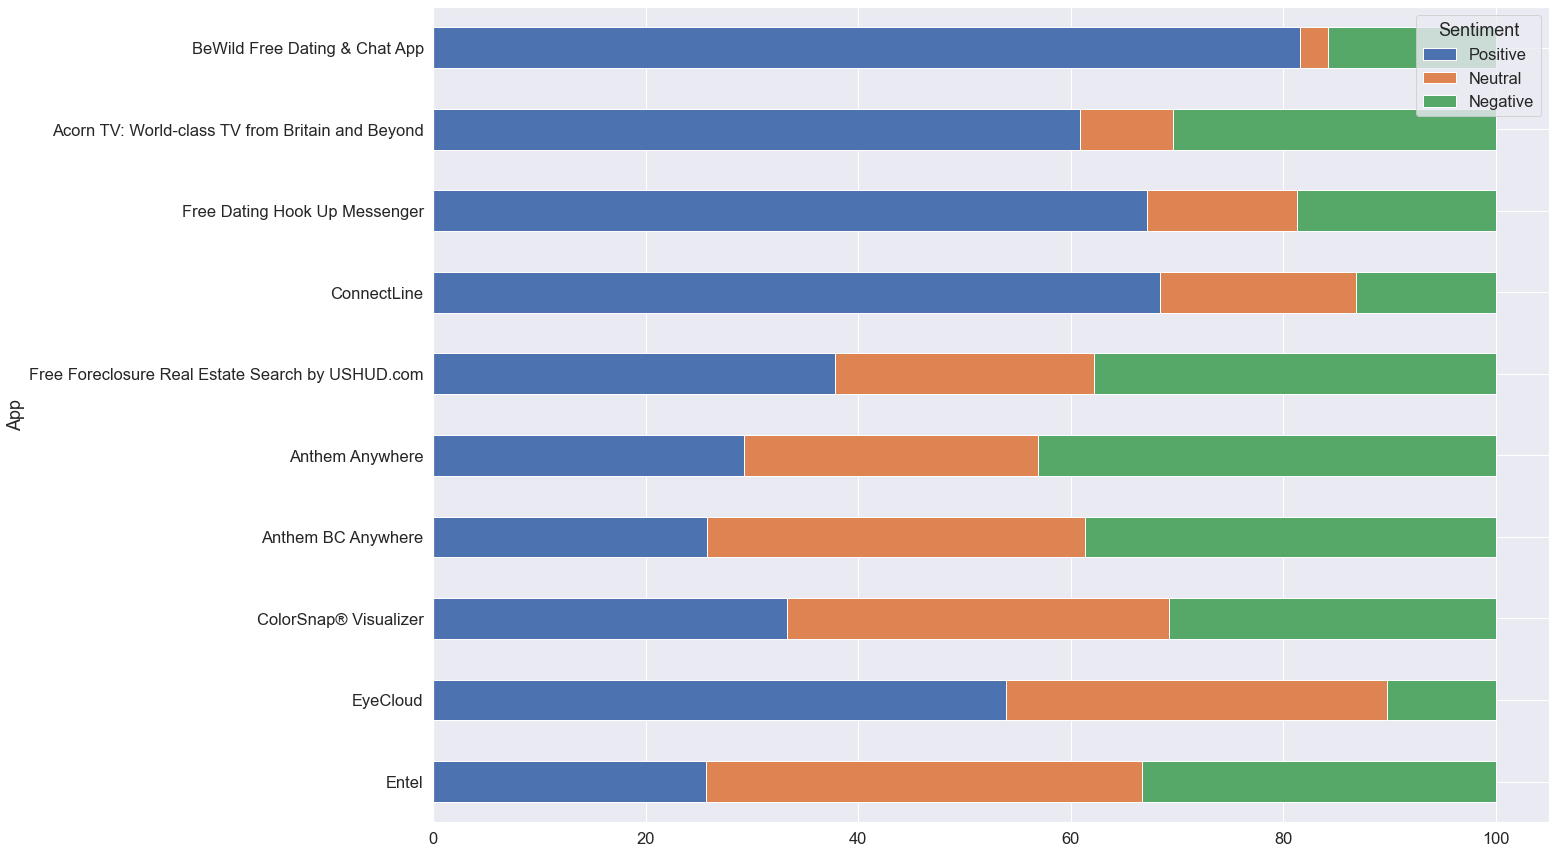

In [546]:
plt.rcParams['figure.figsize'] = [20.0, 15.0]
reviews_df_pivot.plot(kind='barh', stacked=True)
plt.savefig('apps having ratings 2.5 to 3.5.jpg')
plt.show()

In [547]:
print(f'{len(reviews_df_pivot)} Apps with rating between 2.5 and 3.5, many without reviews')
print(f'Positive sentiments: {round(reviews_df_pivot["Positive"].mean(), 3)}%')
print(f'Neutral sentiments: {round(reviews_df_pivot["Neutral"].mean(), 3)}%')
print(f'Negative sentiments: {round(reviews_df_pivot["Negative"].mean(), 3)}%')

10 Apps with rating between 2.5 and 3.5, many without reviews
Positive sentiments: 48.375%
Neutral sentiments: 24.413%
Negative sentiments: 27.212%


* ### From above analysis we can see that out of 603 apps only 15 apps are there whose reviews are mentioned and our hypothesis is not true because more than neutral reviews there are postive and negative review almost 80%. It is may be because reviews are not translated properly and less number of apps are there which reviews are there it may be possible if we have more apps reviews our hypothesis can be satisfied

# Assuming apps having ratings 3.5 to 5 having postive reviews

In [548]:
ratings = (df1.Rating >= 3.5) & (df1.Rating < 5)
col_df1 = ['App', 'Rating', 'Reviews']
rating_df = df1[ratings][col_df1]
rating_df

,App,Rating,Reviews
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.100000,159
1,Coloring book moana,3.900000,967
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.700000,87510
3,Sketch - Draw & Paint,4.500000,215644
4,Pixel Draw - Number Art Coloring Book,4.300000,967
...,...,...,...
9129,FR Calculator,4.000000,7
9130,FR Forms,4.193338,0
9131,Sya9a Maroc - FR,4.500000,38
9133,Parkinson Exercices FR,4.193338,3


In [549]:
col_df2 = ['App', 'Translated_Review', 'Sentiment']
df2[col_df2]

,App,Translated_Review,Sentiment
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive
2,10 Best Foods for You,Works great especially going grocery store,Positive
3,10 Best Foods for You,Best idea us,Positive
4,10 Best Foods for You,Best way,Positive
...,...,...,...
37422,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive
37423,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive
37424,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative
37425,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive


In [550]:
reviews_df = rating_df.merge(df2[col_df2], on='App')
reviews_df_pivot = reviews_df.pivot_table('Rating',columns='Sentiment', index='App', aggfunc='count')
col = ['Positive', 'Neutral', 'Negative']
reviews_df_pivot = reviews_df_pivot[col]
reviews_df_pivot = calculate_percentage(reviews_df_pivot)
reviews_df_pivot = reviews_df_pivot.sort_values(by=['Neutral', 'Positive', 'Negative'], ascending=False)
zero_counts_filter = (reviews_df_pivot.Positive != 0.0) & (reviews_df_pivot.Neutral != 0.0) & (reviews_df_pivot.Negative != 0.0)
reviews_df_pivot = reviews_df_pivot[zero_counts_filter]
reviews_df_pivot


Sentiment,Positive,Neutral,Negative
App,,,
AdWords Express,40.000000,56.000000,4.000000
File Manager -- Take Command of Your Files Easily,45.454545,50.000000,4.545455
"Calculator - free calculator, multi calculator app",25.000000,50.000000,25.000000
FOSSIL Q: DESIGN YOUR DIAL,48.484848,48.484848,3.030303
Blood Pressure(BP) Diary,35.000000,45.000000,20.000000
...,...,...,...
Diary with lock,87.878788,2.020202,10.101010
Avakin Life - 3D virtual world,75.362319,1.449275,23.188406
Cooking Fever,40.740741,0.740741,58.518519


C:\Users\asus\anaconda3\envs\Palash\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 127968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\asus\anaconda3\envs\Palash\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 10004 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\asus\anaconda3\envs\Palash\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 65039 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\asus\anaconda3\envs\Palash\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 127968 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\asus\anaconda3\envs\Palash\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 10004 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\asus\anaconda3\envs\Palash\lib\site-packages\matplotlib\backend

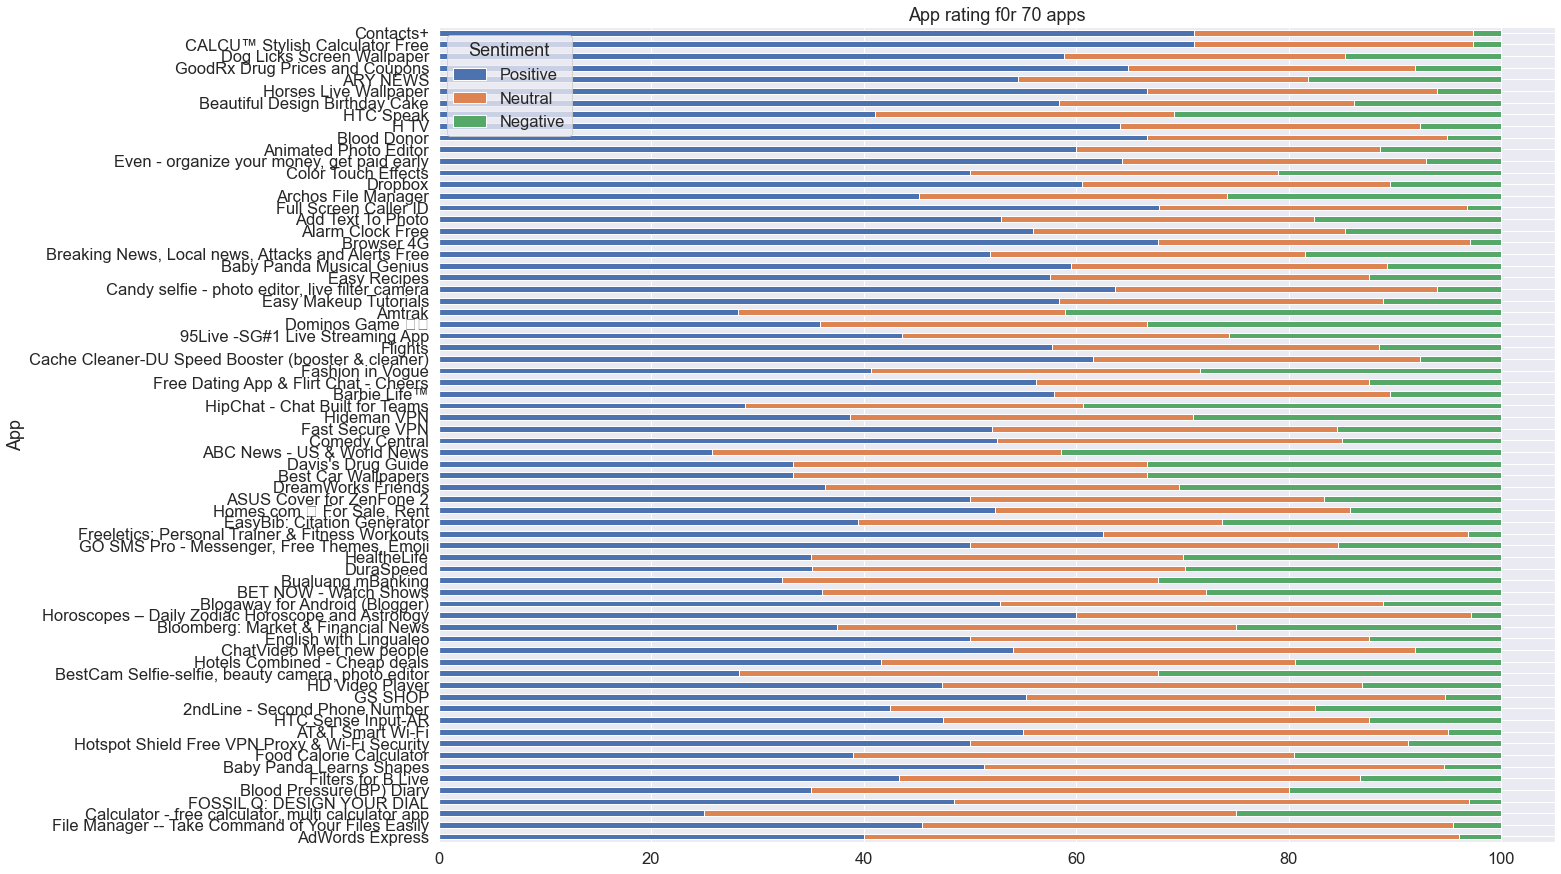

In [551]:
plt.rcParams['figure.figsize'] = [20.0, 15.0]
reviews_df_pivot[0:70].plot(kind='barh', stacked=True)
plt.title("App rating f0r 70 apps")
plt.savefig("apps having ratings 2.5 to 3.5 first 70 app.jpg")
plt.show()

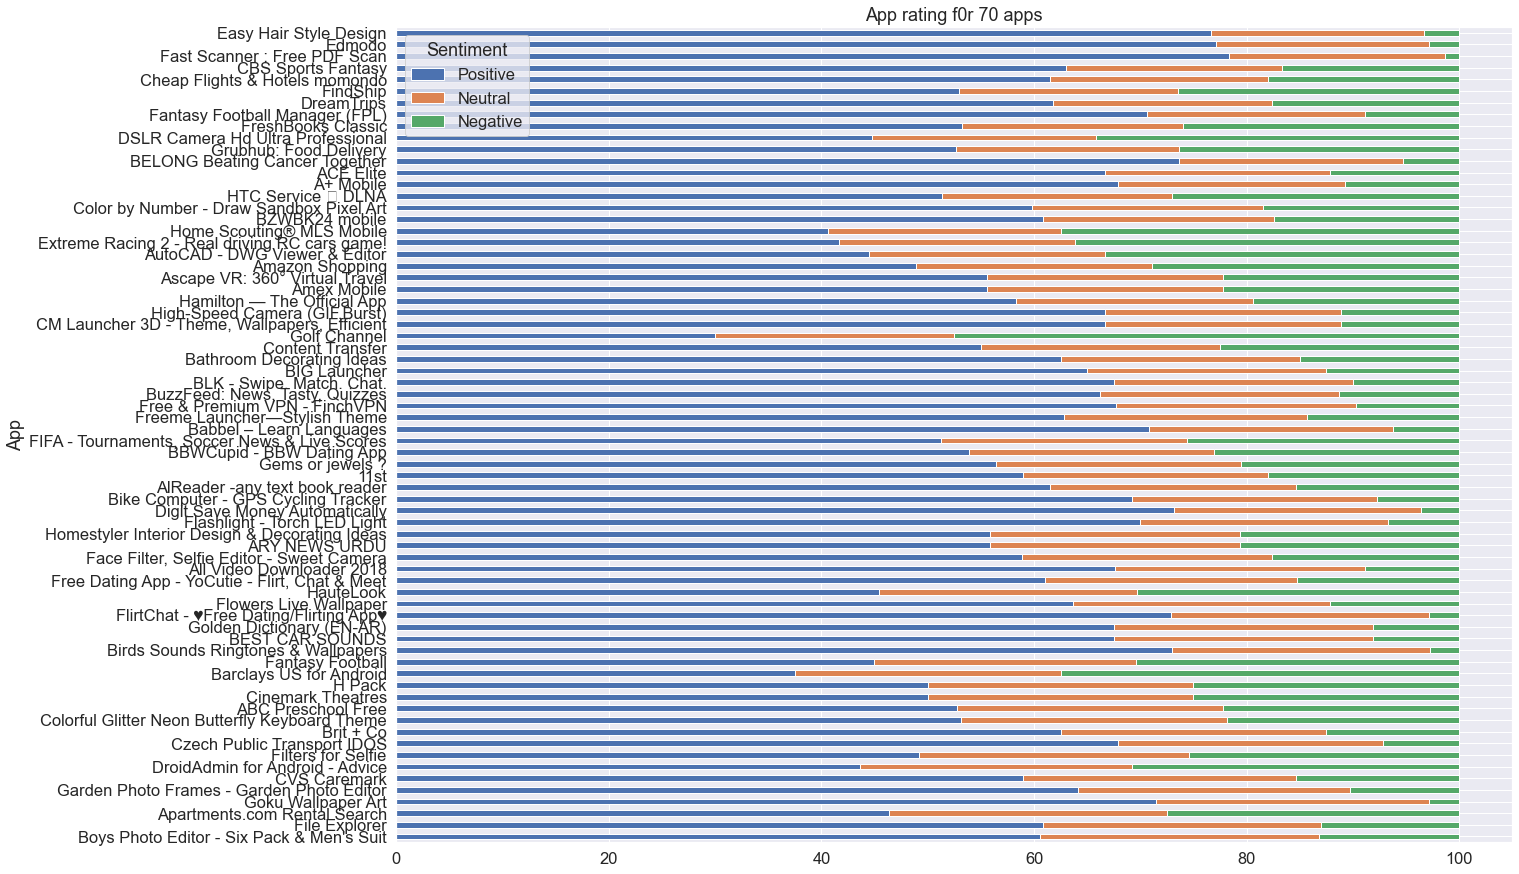

In [553]:
plt.rcParams['figure.figsize'] = [20.0, 15.0]
reviews_df_pivot[70:140].plot(kind='barh', stacked=True)
plt.title("App rating f0r 70 apps")
plt.savefig("apps having ratings 2.5 to 3.5 70 to  140 app.jpg")
plt.show()

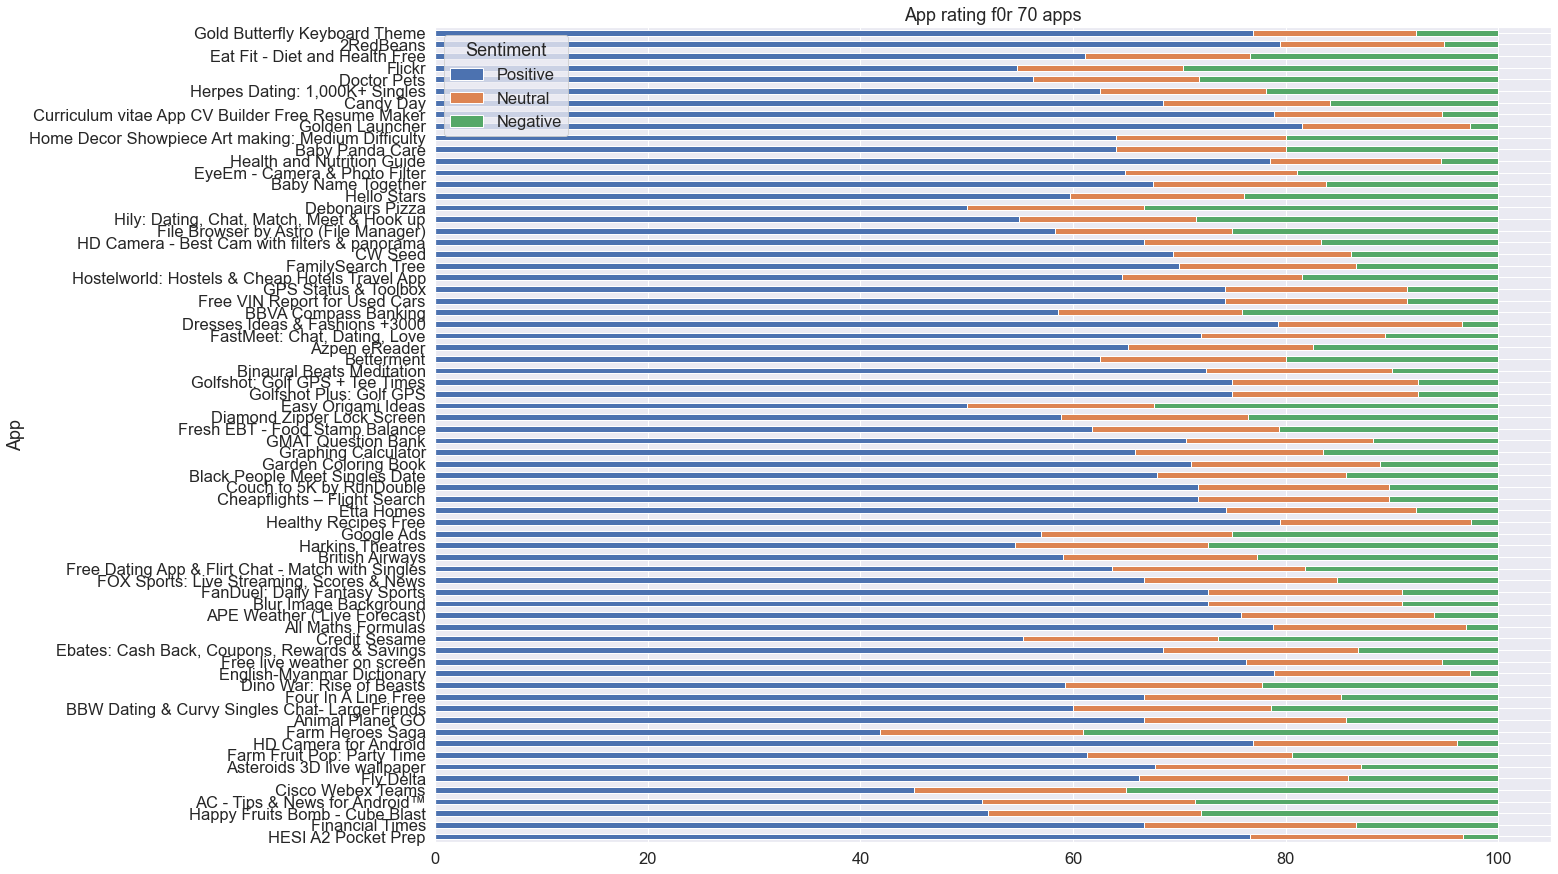

In [554]:
plt.rcParams['figure.figsize'] = [20.0, 15.0]
reviews_df_pivot[140:210].plot(kind='barh', stacked=True)
plt.title("App rating f0r 70 apps")
plt.savefig("apps having ratings 2.5 to 3.5 140 to 210 app.jpg")
plt.show()

In [555]:
print(f'{len(reviews_df_pivot)} Apps with rating between 2.5 and 3.5, many without reviews')
print(f'Positive sentiments: {round(reviews_df_pivot["Positive"].mean(), 3)}%')
print(f'Neutral sentiments: {round(reviews_df_pivot["Neutral"].mean(), 3)}%')
print(f'Negative sentiments: {round(reviews_df_pivot["Negative"].mean(), 3)}%')

437 Apps with rating between 2.5 and 3.5, many without reviews
Positive sentiments: 63.662%
Neutral sentiments: 16.395%
Negative sentiments: 19.942%


* ### Out of 9823 apps only 634 reviews are mentioned. But we see from these many reviews only that almost 63% are postivie reviews so our hypothesis is valid. 

# Factors affecting the ratings of the App

In [556]:
org_df = df1.copy()
org_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,date,year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,January 7,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,January 15,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,August 1,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,June 8,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,June 20,2018


In [557]:
df1["Rating"] = df1["Rating"].apply(lambda x: "Bad" if 0 <= x <2.5 else ("Average" if 2.5 <= x <3.5 else "Good"))


In [558]:
df1["Size"] = df1["Size"].apply(lambda x: "Small" if 1 <= x <10 else ("Medium" if 10 <= x <30 else "Large"))

In [559]:
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,date,year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,Good,159,Medium,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,January 7,2018
1,Coloring book moana,ART_AND_DESIGN,Good,967,Medium,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,January 15,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,Good,87510,Small,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,August 1,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,Good,215644,Medium,50000000,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,June 8,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,Good,967,Small,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,June 20,2018


In [560]:
rating_install = df1.groupby("Rating")["Installs"].sum().sort_values(ascending = False).reset_index()
rating_install

,Rating,Installs
0,Good,6.476852e+10
1,Average,2.851307e+08
2,Bad,1.000732e+07


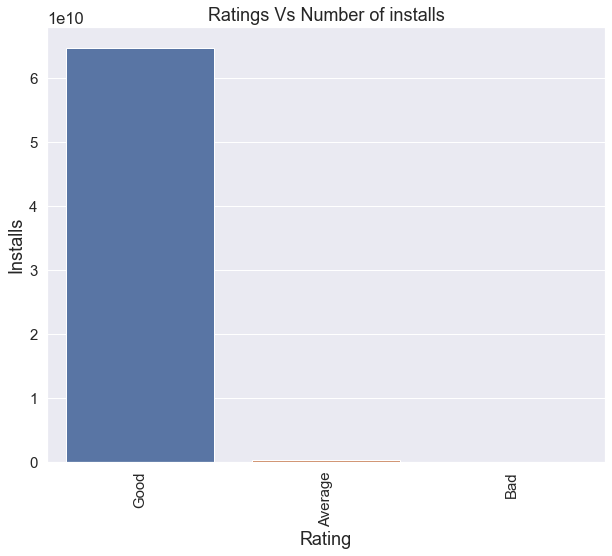

In [561]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.5)
plt.xticks(fontsize=15, rotation = 90)
plt.yticks(fontsize=15)
sns.barplot(data=rating_install, x = "Rating", y = "Installs")

plt.xlabel("Rating")
plt.title("Ratings Vs Number of installs")
plt.savefig("Taing Vs installs.jpg")
plt.show()

* ### From here we can see clearly that if ratings are Good then a person wants to install an app.

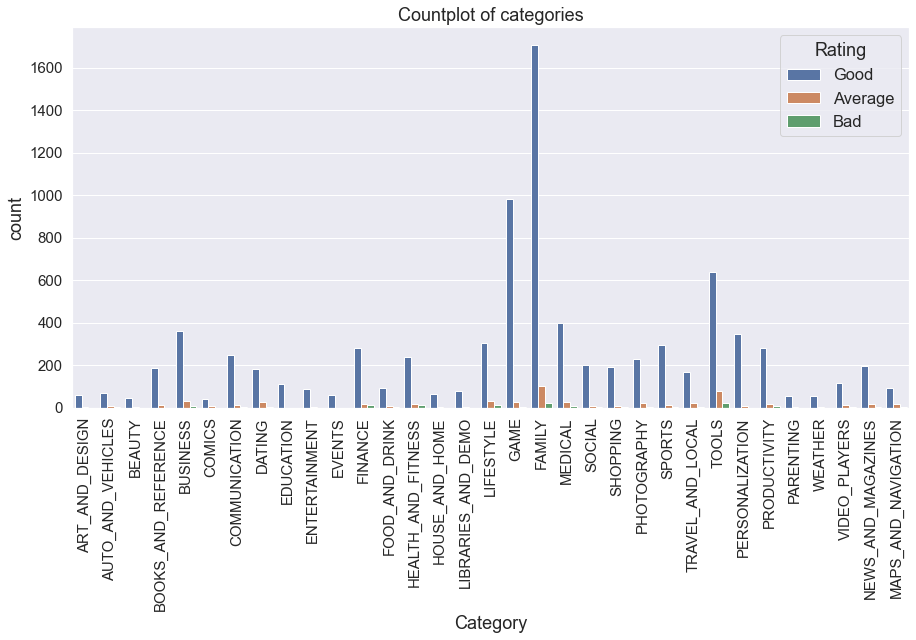

In [562]:
plt.figure(figsize=(15,7))
sns.set(font_scale=1.5)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
sns.countplot(data = df1, x = "Category", hue="Rating")
plt.xticks(rotation=90)
plt.title("Countplot of categories")
plt.savefig("Categories Countplot.jpg")
plt.show()

* ### From here we can see that for game and family categories ratings are Good so we can assume that reviews are also postive. 

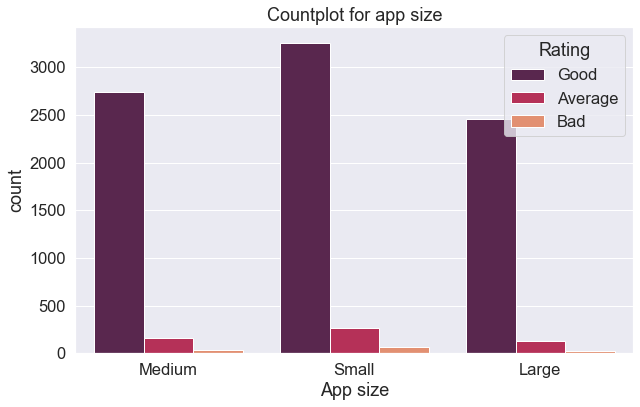

In [563]:
plt.figure(figsize = (10,6))
sns.countplot(data = df1, x = "Size", hue = "Rating", palette = "rocket")
plt.xlabel("App size")
plt.title("Countplot for app size")
plt.savefig("App size Vs Rating.jpg")
plt.show()

* ### from here we can assume that people prefer small size apps thats why there ratings are goods and because ratings are good it can also assume that people will post positive review if the size of the app is small.

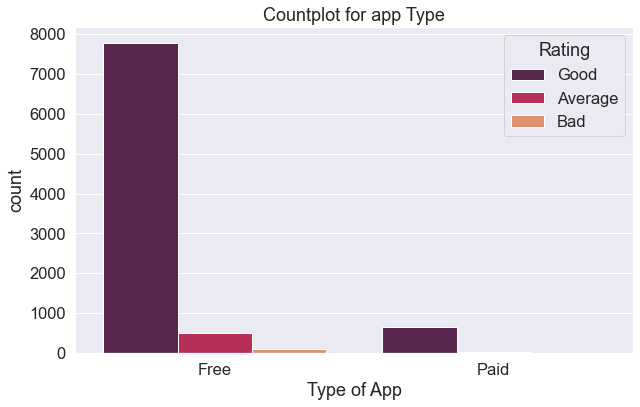

In [565]:
plt.figure(figsize = (10,6))
sns.countplot(data = df1, x = "Type", hue = "Rating", palette = "rocket")
plt.xlabel("Type of App")
plt.title("Countplot for app Type")
plt.savefig("App Type Vs Rating.jpg")
plt.show()

* ### from here we can assume that people prefer Free apps thats why there ratings are goods and because ratings are good it can also assume that people will post positive review if the app is free.

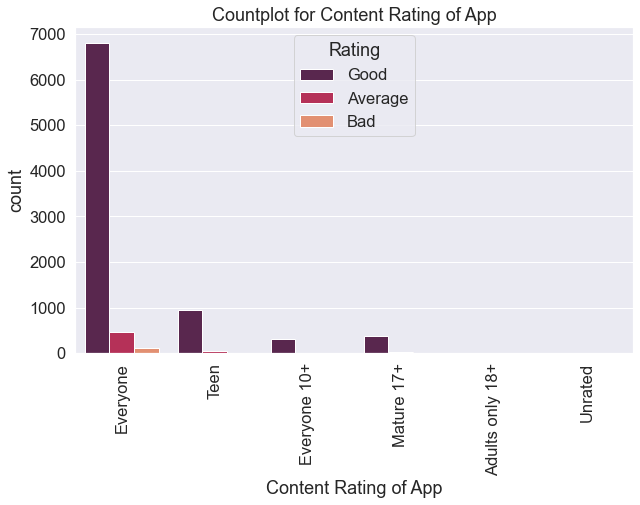

In [566]:
plt.figure(figsize = (10,6))
sns.countplot(data = df1, x = "Content Rating", hue = "Rating", palette = "rocket")
plt.xticks(rotation=90)
plt.xlabel("Content Rating of App")
plt.title("Countplot for Content Rating of App")
plt.savefig("Content Rating Vs Rating.jpg")
plt.show()

* ### from here we can assume that people prefer the apps which can use by all thats why there ratings are goods and because ratings are good it can also assume that people will post positive review if the app is useful for everone.

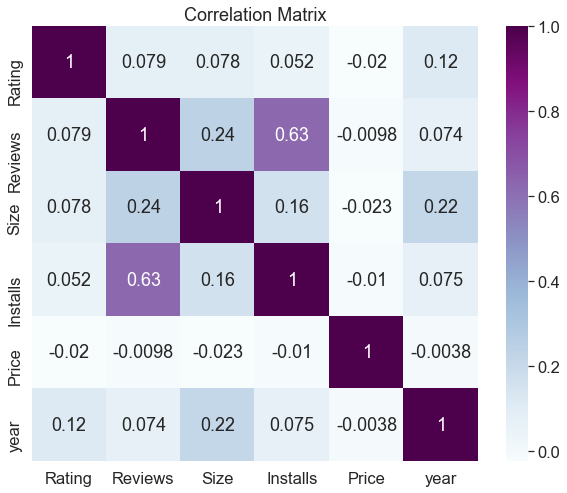

In [567]:
plt.figure(figsize=(10,8))
sns.heatmap(org_df.corr(), annot=True, cmap="BuPu")
plt.title("Correlation Matrix")
plt.savefig("Corr.jpg")
plt.show()


## From the above all analysis we can conclude that the apps will get postive reviews only when there ratings are good. And ratings are majorily depends on the size of the app, content rating of the app, category of the app, type of the app.